# Part II - Ford GoBike Trip lengths over weekdays, Usertype, gender
## by Muhammad almutiri

## Investigation Overview


> in this investigation, i looked at how the trip lengths could change in regards to user type, genders, and on which weekday the trips were taken, and how all of those elements could effect said trip lengths 



## Dataset Overview

> ford go bike dataset which is dataset that includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. the data consists of 183412 instances and 16 features, out of those 16 features we got 2 of the type int, 7 floats , 2 datetime and 5 objects (9 numerical , 2 dates , 5 objects)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata_final.csv')
cats = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6} 

df= df.loc[df['weekday_end'].map(cats).sort_values(ascending=True).index];

In [3]:
def plot_bar(df, xdata, ydata, hue, dodge, ylim, ylabel,xlabel,title, legend):
    plt.figure(figsize = [14, 6])
    sb.boxplot(data=df, x=xdata, y= ydata, dodge=dodge, hue=hue,)
    plt.ylim(0, ylim)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    if legend:
        plt.legend(loc='upper left')
    plt.show();

In [4]:
def plot_count(df, xdata, hue, dodge, ylabel,xlabel,title, count):
    plt.figure(figsize = [14, 6])
    plots = sb.countplot(data=df, x=xdata, hue=hue, dodge=dodge)
    if count:
        for p in plots.patches:
           plots.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+.08, p.get_height()+511))

    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.show();

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## 1. distribution of trip durations

> trip lengths range from 60 seconds (1 minute) up to 85444 seconds (~ 24 hours), i will be ploting it on logarithmic scale it takes unimodal Distribution shape. with most trips taking place between 500 to 700 seconds


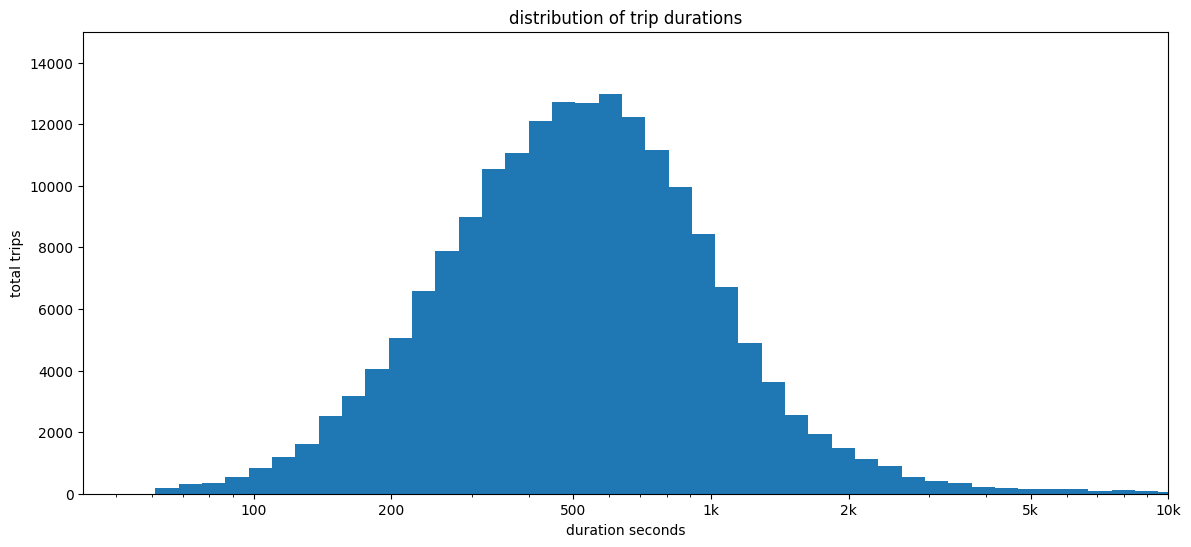

In [5]:
plt.figure(figsize=(14, 6))
bins = 10 ** np.arange(np.log10(df['duration_sec'].min()), np.log10(df['duration_sec'].max()) + 0.051, 0.051)
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlabel('duration seconds');
plt.ylabel('total trips')
plt.xscale('log');
plt.title("distribution of trip durations")
plt.xticks([100,200,500, 1000, 2000, 5000, 10000], [100,200, 500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])

plt.show();

## 2. distribution user type over the number trips

> users were split into two groups subscribers and customers the larger of which is the subscribers with 160k, while customers are less than 40k

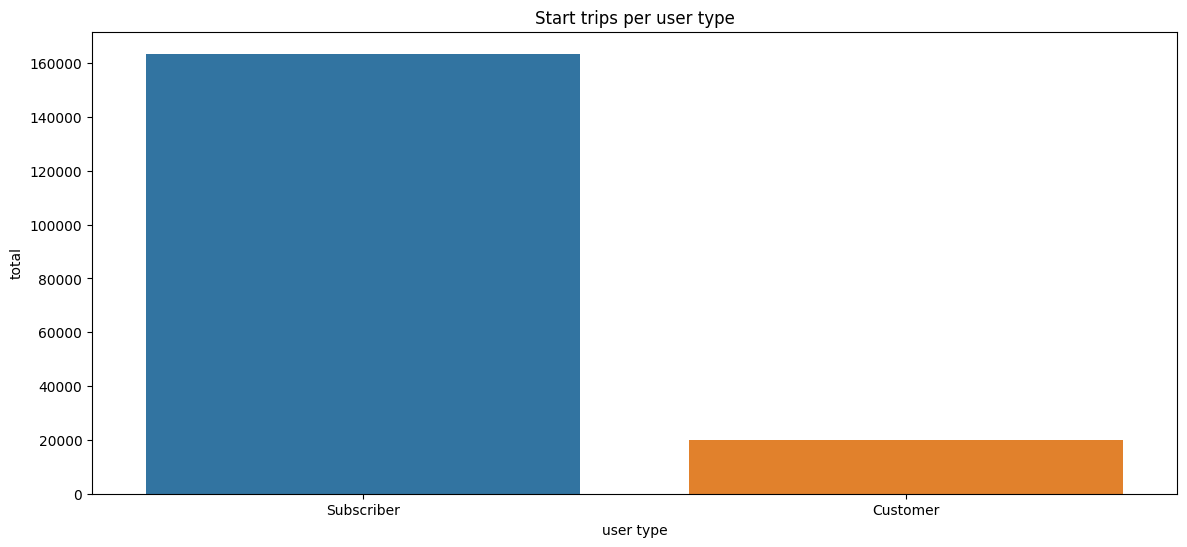

In [6]:
plot_count(df, 'user_type', None, False, "total","user type","Start trips per user type", False);

## 3. user type distribution over trips duration

>Ploting the user type with repsepect to trip durations, allthough we have seen that subscribers are more than customers we can see from the plot that customers on avg have longer trips



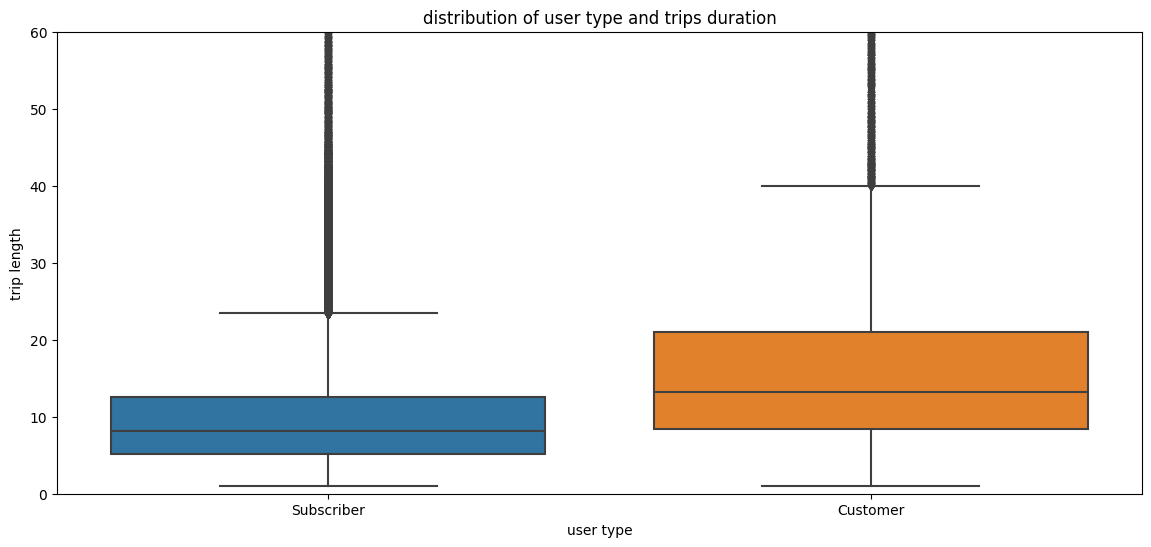

In [7]:
plot_bar(df, "user_type", "duration_min", None, False, 60, 'trip length','user type',
         'distribution of user type and trips duration', False);

## 4. distribution of user type over weekdays

>subscribers take more trips on all week days.



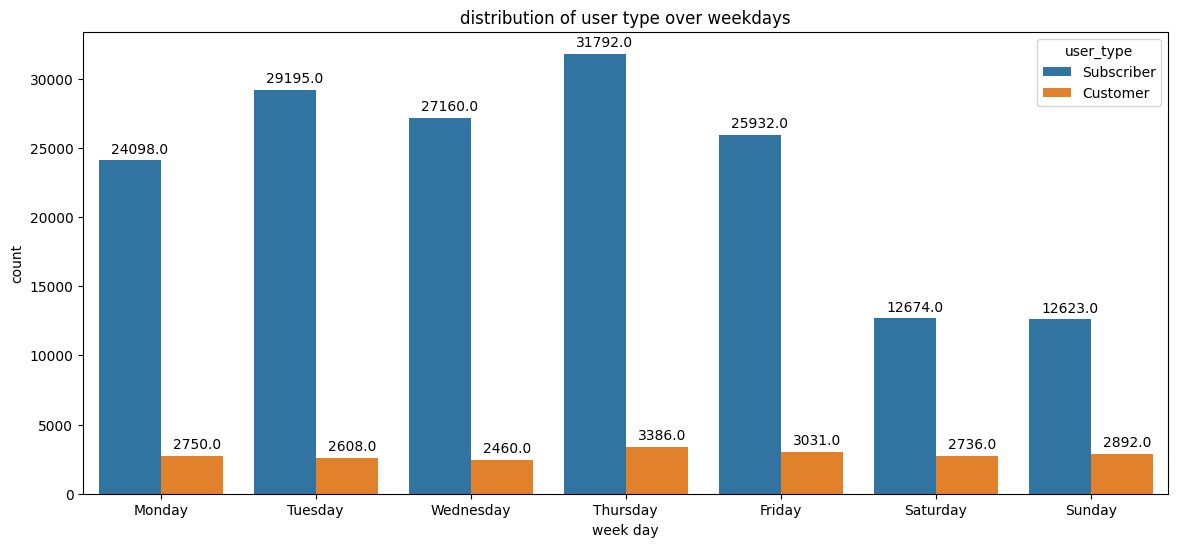

In [8]:
plot_count(df, 'weekday_end', "user_type", True, 'count',"week day",'distribution of user type over weekdays', True);

## 5. user type distribution over trips duration and weekdays

>customers on avg take longer trips on all week days with spikes on weekends, while subscribers have a lower but consistent avg on all days with no spikes.



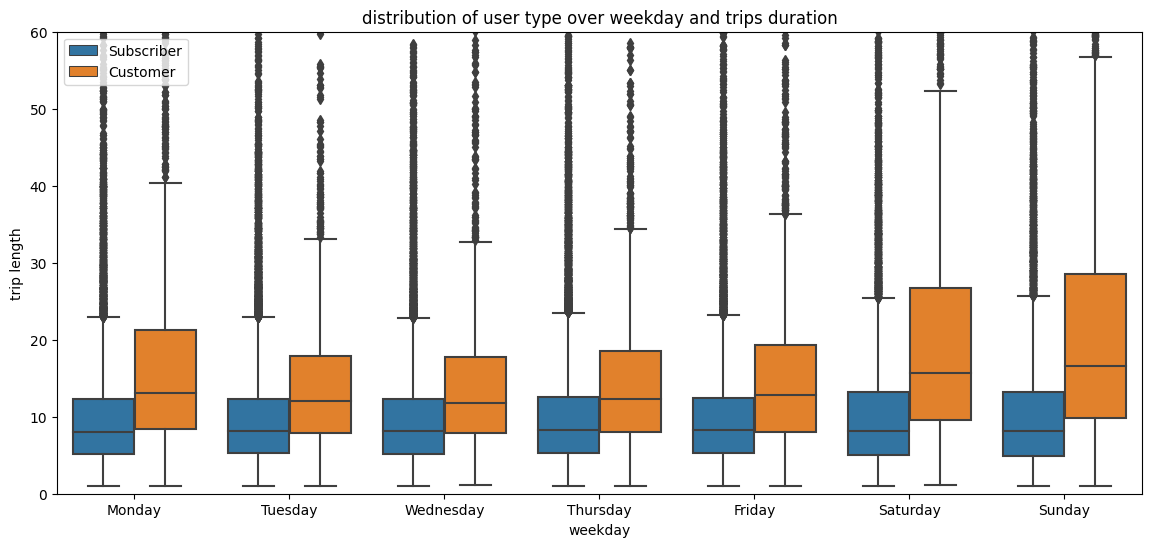

In [9]:
plot_bar(df, 'weekday_end', "duration_min", "user_type", True, 60, 'trip length','weekday',
         'distribution of user type over weekday and trips duration', True);

## 6. gender and user type distribution over trips duration

>customers on all genders have longer trips than subscribers



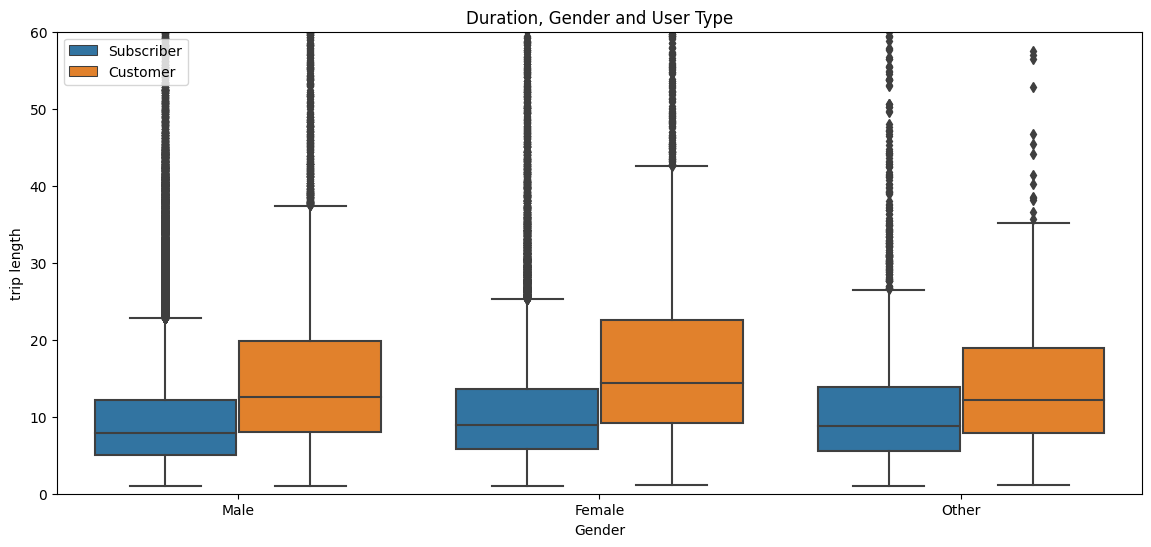

In [10]:
plot_bar(df, 'member_gender', "duration_min", "user_type", True, 60, 'trip length','Gender',
         'Duration, Gender and User Type', True);

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!python -m jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 